In [20]:
import os
os.chdir('../src/')

import pandas
import numpy
import matplotlib.pyplot as plt

import data_layer

In [21]:
df_clusters = pandas.read_csv("../data/final/clustered_data.csv")

In [22]:
df_clusters.head()

,sexo,antiguedad,age,ind_cco_fin_ult1,ind_cno_fin_ult1,ind_ctop_fin_ult1,ind_ecue_fin_ult1,ind_recibo_ult1,cluster
0,H,11,21,1,0,0,0,0,2
1,V,160,44,1,0,1,0,0,0
2,V,130,71,0,0,1,0,0,0
3,H,23,23,1,0,0,0,0,2
4,V,21,22,1,0,0,0,0,2


0.5130923925959398


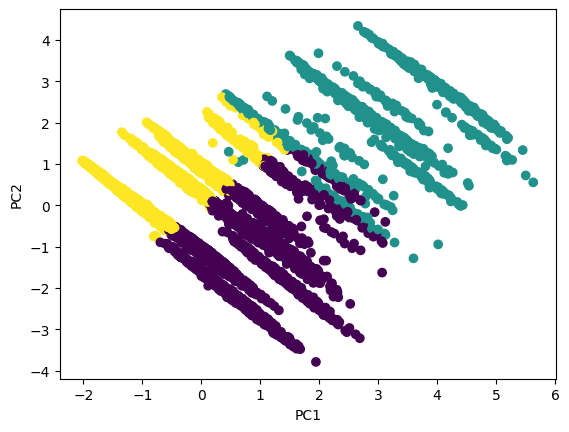

In [25]:
from sklearn.decomposition import PCA

df_to_pca = df_clusters[[col for col in df_clusters.columns if col != 'cluster']].copy()
pca = PCA(n_components=2, random_state=0)
x_new = pca.fit_transform(data_layer.process(df_to_pca))
print(pca.explained_variance_ratio_.sum())

plt.scatter(x_new[:,0], x_new[:,1], c = df_clusters['cluster'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [50]:
df_clusters['cluster'].value_counts()

cluster
2    5085
0    3851
1    1064
Name: count, dtype: int64

In [46]:
from sklearn.datasets import load_iris
from sklearn import tree

df_to_model = df_clusters.copy()
df_to_model['sexo'] = pandas.get_dummies(df_to_model['sexo'], drop_first=True).astype(int)
X, y = df_to_model.iloc[:, :-1], df_to_model.iloc[:, -1:]
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X, y)

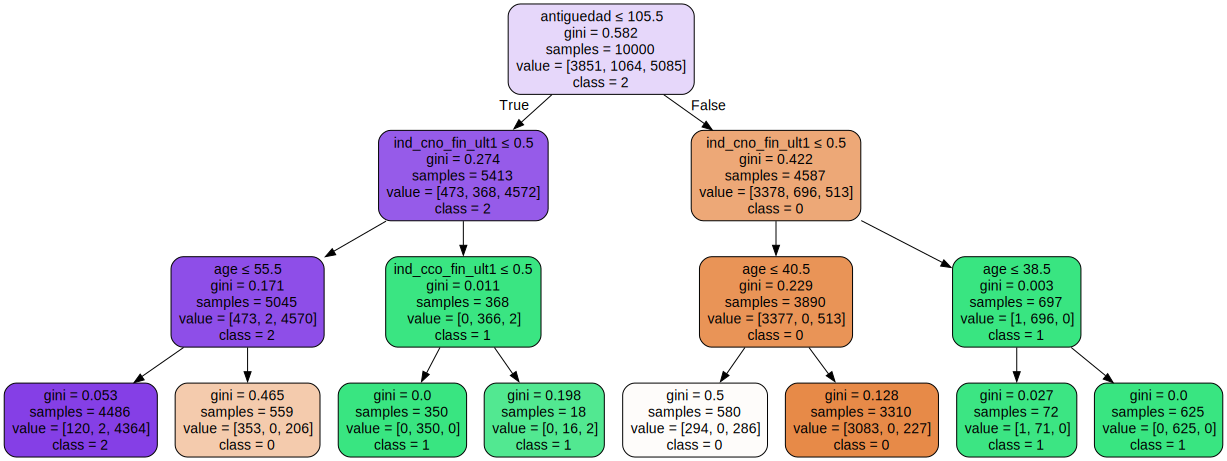

In [49]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

import graphviz

dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=X.columns,
                    class_names=['0','1','2'],
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 